In [2]:
import pickle

In [3]:
import numpy as np

In [4]:
n_folds = 5

In [5]:
models = [
    {
        'name': 'flaubert/flaubert_small_cased',
        'label': 'flau_small_c',
        'to_print': 'FlauBERT'

    },
    {
    
        'name': 'flaubert/flaubert_base_uncased', 
        'label': 'flau_base_u'

    },
    {
        'name': 'flaubert/flaubert_base_cased',
        'label': 'flau_base_c'
    },
    {
        'name': 'flaubert/flaubert_large_cased',
        'label': 'flau_large_c'
    },
    {
        'name': 'camembert/camembert-base',
        'label': 'cam_base'
    },
    {
        'name': 'xlm-roberta-large',
        'label': 'xlm_large'
    },
    {
    
        'name': 'xlm-roberta-base', 
        'label': 'xlm_base'

    },
    {
        'name': 'bert-base-multilingual-uncased',
        'label': 'bert_base_u'
    },
    {
        'name': 'distilbert-base-multilingual-cased',
        'label': 'distilbert_base',
        'to_print': 'DistilBERT'
        
    },
    {
        'name': 'bert-base-multilingual-cased',
        'label': 'bert_base_c'
    }
    
]

In [6]:
labels = [x['label'] for x in models]

In [7]:
tasks = [
    'gender_noun',
    'gender_adj',
    'gender_na',
    'number_noun',
    'number_adj',
    'number_na',
    'pos_noun',
    'pos_adj',
    'pos_verb',
    'semantic_person',
    'semantic_act'
]

In [8]:
def get_stable_dims(label, task):
    with open(f'../Data/best_results/{task}_dims.pickle', 'rb') as f:
        dims = pickle.load(f)

    with open(f'../Data/best_results/{task}_accs.pickle', 'rb') as f:
        accs = pickle.load(f)

    with open(f'../Data/best_results/{task}_medians.pickle', 'rb') as f:
        medians = pickle.load(f)
    
    all_best_dims = []
    for i in range(n_folds):
        test = {k: v[i] for k, v in accs[label].items()}
        all_best_dims.extend(dims[label][max(test, key=test.get)][i])
        
    d, c = np.unique(all_best_dims, return_counts=True)
    
    stable_dims = [x[0] for x in zip(d,c) if x[1] == n_folds]
    
    return stable_dims

# FlauBERT small

In [9]:
# Dims representing gender for nouns
gn = get_stable_dims(labels[0], tasks[0])

In [12]:
# Dims representing number for nouns
nn = get_stable_dims(labels[0], tasks[3])

In [13]:
act = get_stable_dims(labels[0], tasks[-1])

In [14]:
person = get_stable_dims(labels[0], tasks[-2])

In [15]:
# Dims representing POS for nouns
posn = get_stable_dims(labels[0], tasks[6])

In [16]:
posv = get_stable_dims(labels[0], tasks[8])

In [17]:
posa = get_stable_dims(labels[0], tasks[7])

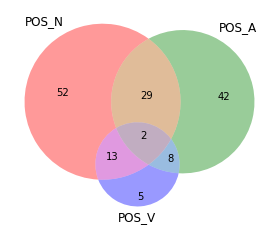

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(posn).difference(posa).difference(posv)),
                 len(set(posa).difference(posn).difference(posv)),
                len(set(posn).intersection(posa)),
                len(set(posv).difference(posn).difference(posa)),
                len(set(posv).intersection(posn)),
                len(set(posv).intersection(posa)),
                len(set(posv).intersection(posa).intersection(posn))

), set_labels = ('POS_N', 'POS_A', 'POS_V'))
plt.show()


In [166]:
from venny4py.venny4py import *


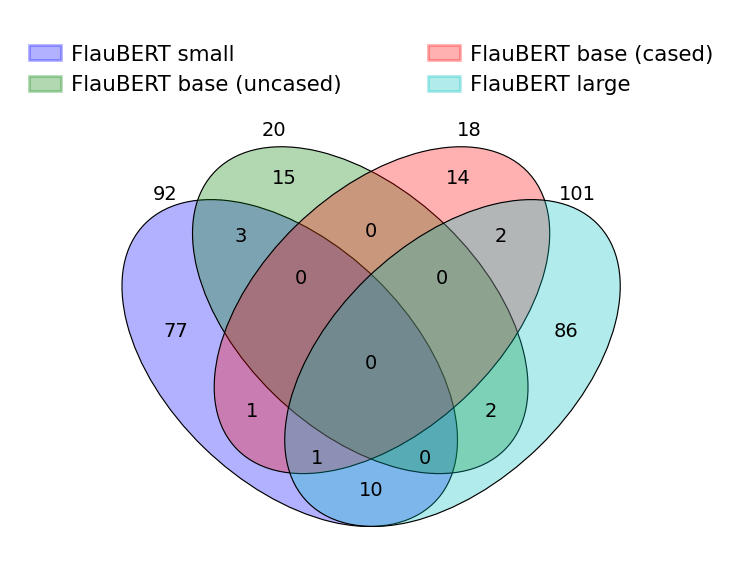

In [197]:
sets = {
    'FlauBERT small': set(get_stable_dims(labels[0], tasks[6])),
    'FlauBERT base (uncased)': set(get_stable_dims(labels[1], tasks[6])),
    'FlauBERT base (cased)': set(get_stable_dims(labels[2], tasks[6])),
    'FlauBERT large': set(get_stable_dims(labels[3], tasks[6]))}
    
venny4py(sets)